# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

We want to be able to create salary predictions of certain jobs based on the dataset provided that cointains info about job titles, distance from city, years of experience and other attritbutes. 

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
import inspect
import pickle

%matplotlib inline

#Author
__author__ = "Phil Baltazar"
__email__ = "phillusnow@gmail.com"
__website__ = "https://github.com/pbswe"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [306]:
#load the data into a Pandas dataframe
def loadFile(file):
    '''Loads csv file to pd dataframe'''
    return pd.read_csv(file)
    
trainFeatDF = pd.read_csv('../Salary_Prediction_Portfolio/data/train_features.csv') 
trainSalsDF = pd.read_csv('../Salary_Prediction_Portfolio/data/train_salaries.csv')
testFeatDF = pd.read_csv('../Salary_Prediction_Portfolio/data/test_features.csv')

### ---- 3 Clean the data ----

In [307]:
# Briefly examine the data.

trainFeatDF.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [308]:
trainSalsDF.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [309]:
testFeatDF.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [310]:
# Verify dtype and length of each dataset via .info() method.

In [311]:
trainFeatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [312]:
trainSalsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [313]:
testFeatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### ---- 4 Explore the data (EDA) ----

In [314]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [315]:
# Identify numerical and categorical variables.

In [316]:
trainFeatDF.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [317]:
numericCols = ['yearsExperience', 'milesFromMetropolis']

In [318]:
categoricCols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [321]:
# So far we know:
# trainFeatDF has 8 columns: 2 of type "int64" and 6 of type "object".
# trainSalsDF has 2 columns: 1 of type "int64" and 1 of type "object".
# testFeatDF has 8 columns:  2 of type "int64" and 6 of type "object".

# Check for missing data and add "NaN" if any found. 

In [322]:
trainFeatDF.replace('?', np.nan, inplace=True)

In [323]:
trainSalsDF.replace('?', np.nan, inplace=True)

In [324]:
testFeatDF.replace('?', np.nan, inplace=True)

In [325]:
# Look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it.

In [326]:
trainFeatDF.duplicated().sum()

0

In [327]:
trainSalsDF.duplicated().sum()

0

In [328]:
testFeatDF.duplicated().sum()

0

In [329]:
# Separate both variable types and summarize them.

In [330]:
trainFeatDF.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [331]:
trainFeatDF.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685179769,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [332]:
# Merge both train_features and train_salaries into one dataframe. Delete the original DFs.

In [333]:
trainDF = pd.merge(trainFeatDF, trainSalsDF, on='jobId')

In [334]:
# Before deleting the original DFs, check that the new one is correct.

trainDF.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [335]:
#Choosing not to delete the originals as this notebook will be reviewed over and over.
#/n This will avoid possible file corruption in case the notebook is reloaded.

#del trainFeatDF
#del trainSalsDF

In [336]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [337]:
# Changing salary type to float, is a better representation for currency.

trainDF['salary'] = trainDF['salary'].astype(float)

trainDF.info()
trainDF['salary'].head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   jobId                1000000 non-null  object 
 1   companyId            1000000 non-null  object 
 2   jobType              1000000 non-null  object 
 3   degree               1000000 non-null  object 
 4   major                1000000 non-null  object 
 5   industry             1000000 non-null  object 
 6   yearsExperience      1000000 non-null  int64  
 7   milesFromMetropolis  1000000 non-null  int64  
 8   salary               1000000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 76.3+ MB


<bound method NDFrame.head of 0         130.0
1         101.0
2         137.0
3         142.0
4         163.0
          ...  
999995     88.0
999996    160.0
999997     64.0
999998    149.0
999999     88.0
Name: salary, Length: 1000000, dtype: float64>

Visualization of target variable (salary)

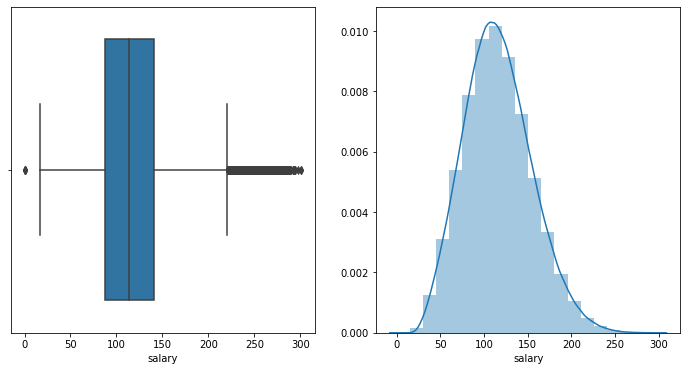

In [338]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(trainDF.salary)
plt.subplot(1, 2, 2)
sns.distplot(trainDF.salary, bins=20)
plt.show()

Use IQR rule to identify potential outliers

More on IQR at: https://medium.com/@TheNewStat1/interquartile-range-iqr-ad671d9476d4

In [339]:
stat = trainDF.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
print(IQR)
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for the suspected bounds are {} and {} respectively.'.format(upper, lower))


count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
53.0
The upper and lower bounds for the suspected bounds are 220.5 and 8.5 respectively.


In [340]:
# Checking for potential outliers below the lower bound.
trainDF[trainDF.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0.0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0.0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0.0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0.0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0.0


In [341]:
# Checking for potential outliers above the upper bound. 

trainDF.loc[trainDF.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [342]:
# Checking for the most suspicious outliers above upper bound.

trainDF[(trainDF.salary > 222.5) & (trainDF.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225.0
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246.0
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225.0
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248.0
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223.0
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226.0
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226.0
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227.0
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230.0
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225.0


In [343]:
# We noticed that the lower bound outliers showed salaries as 0, which does not seem right /n
# so we will remove those from our dataset.

trainDF[trainDF.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0.0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0.0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0.0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0.0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0.0


In [344]:
trainDF.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [345]:
# Value_counts gives you how many features of a column from a variable of type OBJ. How cool!
trainDF['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [346]:
# The upper bound outliers showed salaries that seem legitimate, although /n
# "Junior with 24 years of experience" for example, does not. We do not want to /n
# destroy any possible correlation on those features so we'll leave them alone for now.

In [347]:
# Using the .corr() method to visualize correlation between variables of type int and float.

trainDF[['yearsExperience', 'milesFromMetropolis', 'salary']].corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


In [348]:
# Remove this cell

#sns.regplot(x='yearsExperience', y='salary', data=trainDF)
#plt.ylim(0,)
#plt.show()
# Why does this one take forever and looks weird?

<Figure size 1440x1440 with 0 Axes>

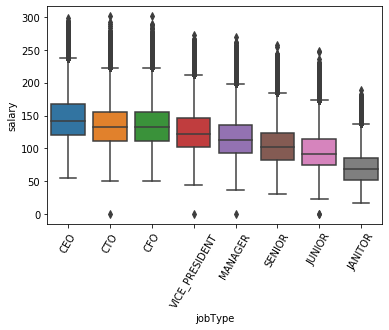

<Figure size 1440x1440 with 0 Axes>

In [349]:
sorted_list = trainDF.groupby('jobType')['salary'].median().sort_values(ascending=False).index
boxPlotGraph = sns.boxplot(x="jobType", y="salary", data=trainDF, order=sorted_list)

plt.xticks(rotation=60)
plt.figure(figsize = (20, 20))

<Figure size 1440x1440 with 0 Axes>

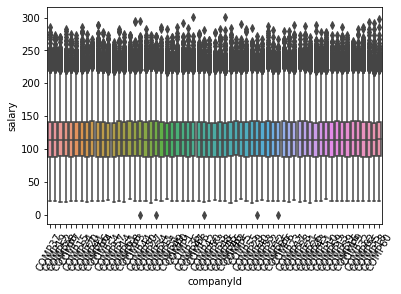

<Figure size 1440x1440 with 0 Axes>

In [350]:
# While a bit cluttered, it's visible that company ID is a poor predictor of salary, /n
# since it shows a straight horizontal line across all features.

boxPlotGraph = sns.boxplot(x="companyId", y="salary", data=trainDF, order=None)
plt.xticks(rotation=60)
plt.figure(figsize = (20, 20))

<Figure size 1440x1440 with 0 Axes>

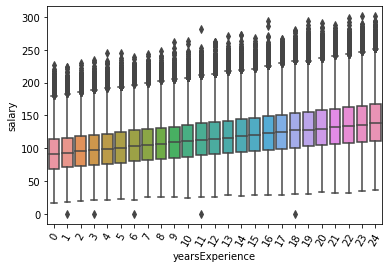

<Figure size 1440x1440 with 0 Axes>

In [351]:
# Years of experience has a nice, clear correlation with salary. /n
# It's a progressive line showing the higher the years of experience, the higher the salary.

boxPlotGraph = sns.boxplot(x="yearsExperience", y="salary", data=trainDF)
plt.xticks(rotation=60)
plt.figure(figsize = (20, 20))

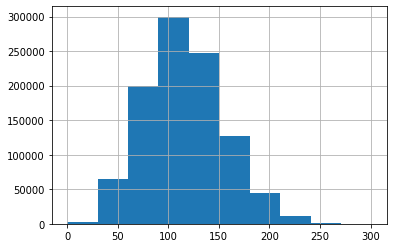

In [352]:
# Looks like the salary mean is around 100-105. 

trainDF.salary.hist() #add or remove ';' at the end for a small difference?

In [353]:
# Remove data with zero salaries
trainDF = trainDF[trainDF.salary > 8.5]

In [363]:
# Heat Map Visualization. First, we need to handle the categorical values.

# We saw numerical and object type in our data. In short, we need to change /n
# the object to categorical, run the function below that transforms the names /n
# of each row with the average salary of each group and after the rows are replaced /n
# with the numbers, change the dtype again to numerical for the heat map to work.

trainDF[categoricCols] = trainDF[categoricCols].astype('category')

def encode_label(trainDF, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = trainDF[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = trainDF[trainDF[col] == cat]['salary'].mean()   
    trainDF[col] = trainDF[col].map(cat_dict)

In [364]:
for col in trainDF.columns:
    if trainDF[col].dtype.name == "category":
        encode_label(trainDF, col)

In [365]:
trainDF[categoricCols] = trainDF[categoricCols].astype('category')

In [366]:
# Checking to see that the target names were replaced by the salary.mean from the function above.
trainDF.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,130.0,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130.0
1,101.0,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101.0
2,137.0,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137.0
3,142.0,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142.0
4,163.0,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163.0


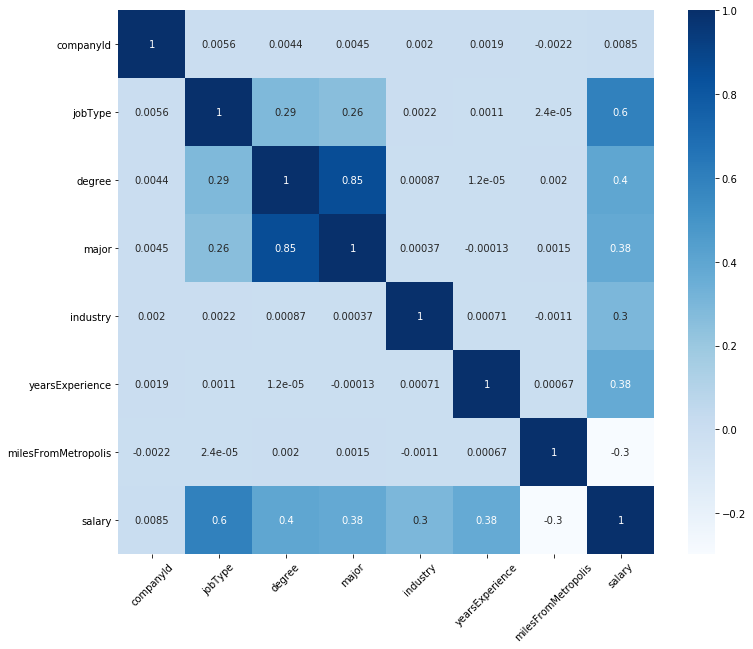

In [367]:
# We need to change the dtype of those columns to float now, since they're numbers. 
# This will also make it possible to visualize on the heat map.
# jobId is discarded because it is unique for individual

trainDF[categoricCols] = trainDF[categoricCols].astype('float')

fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 
            'yearsExperience', 'milesFromMetropolis']
sns.heatmap(trainDF[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

In [369]:
# Based on the heat map, industry, YoE and miles from metropolis are the /n
# strongest correlators to salary. 

### ---- 5 Establish a baseline ----

In [370]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [371]:
df_baseline.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [373]:
# Splitting features and targets

df_features_baseline = df_baseline[['companyId','jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis']]
df_targets_baseline = df_baseline[['salary']]

# Optional deletion
# del df_baseline

In [376]:
lr = LinearRegression()
lr_baseline_mse = cross_val_score(lr, df_features_baseline, df_targets_baseline, 
                                  scoring = 'neg_mean_squared_error')

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 

In [377]:

lr_baseline_mse = -1*lr_baseline_mse.mean()
print("Baseline MSE Score: ", lr_baseline_mse)

#'''In this case, MSE (mean squared error) is the best metric to measure the efficacy /n
#    because the prediction here is on salaries, which are numerical in nature. '''
# groupy for each industry and get the error from that. 
# Write MSE algorithm? Not here. See Part 3 - Develop. 

Baseline MSE Score:  nan


### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

In [ ]:
''' Choose about 3 models based on the EDA that you think will be effective. '''

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

# One hot encoding, create new features if needed. Tune models as shown below.

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data